In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import pandas as pd
import decoupler as dc

In [21]:
sc.set_figure_params(dpi=200)

In [3]:
adata = sc.read("/home/lugli/spuccio/Projects/SP025_NaClTcell/singlecell/Analysis/cluster_integrated_with_DESC.h5ad")

In [4]:
adata.layers

Layers with keys: log1p, norm_data, raw_counts, regressed, scaled, scaled_regressed

In [5]:
adata.X = adata.layers['log1p']

In [6]:
def run_vis(adata):
    if 'X_emb' in adata.obsm:
        sc.pp.neighbors(adata, use_rep='X_emb',n_neighbors=10, n_pcs=30)
        sc.tl.umap(adata)
    else:
        sc.pp.pca(adata, svd_solver='arpack')
        sc.pp.neighbors(adata)
        sc.tl.umap(adata)

In [7]:
adata.obsm['X_emb'] = adata.obsm['X_Embeded_z'+str(0.5)]
run_vis(adata)

2022-07-07 17:25:54.006521: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-07-07 17:25:54.010366: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-07 17:25:54.010388: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [8]:
adata = adata[:, adata.var.highly_variable]

# Progeny

In [26]:
model = dc.get_progeny(organism='mouse', top=300)
model

,source,target,weight,p_value
0,Androgen,Tmprss2,11.490631,0.000000e+00
1,Androgen,Nkx3-1,10.622551,2.242078e-44
2,Androgen,Mboat2,10.472733,4.624285e-44
3,Androgen,Klk2,10.176186,1.944414e-40
4,Androgen,Sarg,11.386852,2.790209e-40
...,...,...,...,...
4195,p53,F5,2.397854,5.746843e-08
4196,p53,Mki67,-5.680340,5.758565e-08
4197,p53,Thoc2,-2.108178,5.858359e-08
4198,p53,Pola1,-4.943873,5.911873e-08


In [27]:
dc.run_mlm(mat=adata, net=model, source='source', target='target', weight='weight', verbose=True,use_raw=False)

Running mlm on mat with 37525 samples and 1725 targets for 14 sources.


100%|██████████| 4/4 [00:02<00:00,  1.37it/s]


In [28]:
adata.obsm['progeny_mlm_estimate'] = adata.obsm['mlm_estimate'].copy()
adata.obsm['progeny_mlm_pvals'] = adata.obsm['mlm_pvals'].copy()
adata

AnnData object with n_obs × n_vars = 37525 × 1725
    obs: 'doublet_scores', 'predicted_doublets', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_disaggregation_score', 'pct_counts_disaggregation_score', 'total_counts_rb', 'pct_counts_rb', 'n_genes', 'SampleID', 'Treatment', 'MouseID', 'batch', 'S_score', 'G2M_score', 'phase', 'desc_0.2', 'desc_0.3', 'desc_0.4', 'desc_0.5', 'desc_0.6', 'desc_0.7', 'desc_0.8', 'desc_0.9', 'desc_1.0', 'desc_1.2'
    var: 'gene_ids', 'feature_types', 'mt', 'disaggregation_score', 'rb', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'n_cells-1', 'n_cells_by_counts-2', 'mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'n_cells-2', 'n_cells_by_counts-3', 'mean_counts-3', 'pct_dropout_by_counts-3', 'total_counts-3', 'n_cells-3', 'highly_variable', 'means', 'dispersions', 'di

In [29]:
acts = dc.get_acts(adata, obsm_key='mlm_estimate')
acts

AnnData object with n_obs × n_vars = 37525 × 14
    obs: 'doublet_scores', 'predicted_doublets', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_disaggregation_score', 'pct_counts_disaggregation_score', 'total_counts_rb', 'pct_counts_rb', 'n_genes', 'SampleID', 'Treatment', 'MouseID', 'batch', 'S_score', 'G2M_score', 'phase', 'desc_0.2', 'desc_0.3', 'desc_0.4', 'desc_0.5', 'desc_0.6', 'desc_0.7', 'desc_0.8', 'desc_0.9', 'desc_1.0', 'desc_1.2'
    uns: 'hvg', 'pca', 'prob_matrix0.2', 'prob_matrix0.3', 'prob_matrix0.4', 'prob_matrix0.5', 'prob_matrix0.6', 'prob_matrix0.7', 'prob_matrix0.8', 'prob_matrix0.9', 'prob_matrix1.0', 'prob_matrix1.2', 'umap', 'neighbors'
    obsm: 'X_Embeded_z0.2', 'X_Embeded_z0.3', 'X_Embeded_z0.4', 'X_Embeded_z0.5', 'X_Embeded_z0.6', 'X_Embeded_z0.7', 'X_Embeded_z0.8', 'X_Embeded_z0.9', 'X_Embeded_z1.0', 'X_Embeded_z1.2', 'X_pca', 'X_umap', 'X_umap0.2', 'X_umap0.3', 'X_umap0.4', 'X_umap0.5', 'X_umap0.6', 'X_umap0.7', 'X_u

In [30]:
mean_acts = dc.summarize_acts(acts, groupby='desc_0.5', min_std=0)
mean_acts

,Androgen,EGFR,Estrogen,Hypoxia,JAK-STAT,MAPK,NFkB,PI3K,TGFb,TNFa,Trail,VEGF,WNT,p53
0,1.509754,-0.248114,0.194072,1.247066,5.676126,1.832553,3.627664,-0.442584,0.980321,-1.642592,-0.325881,0.647516,-0.226771,0.064551
1,0.370416,-0.228605,0.046898,0.993973,4.144330,1.598496,2.730495,-0.281609,0.518181,-1.585895,-0.143538,0.498287,-0.239739,0.364035
10,0.568351,-0.108286,-0.050556,0.320500,2.721375,0.978915,1.897397,-0.440569,0.358539,-1.054360,0.104492,0.287895,-0.127242,0.066262
11,1.499353,0.628474,-0.218489,0.463503,2.226495,-0.321999,4.227584,-0.213532,0.940461,-2.364134,-0.119062,0.620821,-0.350641,-0.320921
12,1.439295,-0.363180,0.230879,3.770848,4.112894,1.808062,3.849755,-0.362816,0.690657,-1.849829,-0.420624,0.777543,-0.202488,0.182364
13,1.010423,0.850994,-1.197489,-0.248522,1.692675,0.210326,1.084237,-0.662685,1.264129,-0.631905,0.776818,0.223288,-0.888430,0.363819
2,1.749978,-0.236309,0.314232,0.697192,5.044922,1.397707,2.539937,-0.572192,0.764851,-0.911024,-0.357516,0.510298,-0.329086,0.193954
3,0.649476,1.241459,-0.287449,0.672850,0.832194,0.004736,0.414596,-0.907701,0.528474,0.347925,0.650611,1.366565,-0.824213,-0.469829
4,0.599374,1.014159,-0.200759,0.498740,1.705298,0.216737,0.297851,-0.465165,0.531362,0.496948,0.000254,1.011143,-0.758043,-0.619394
5,1.346356,0.482818,0.070645,0.803912,5.082609,0.902750,2.169597,-0.807107,0.510055,-0.878358,0.504609,0.109037,-0.403166,-0.076435


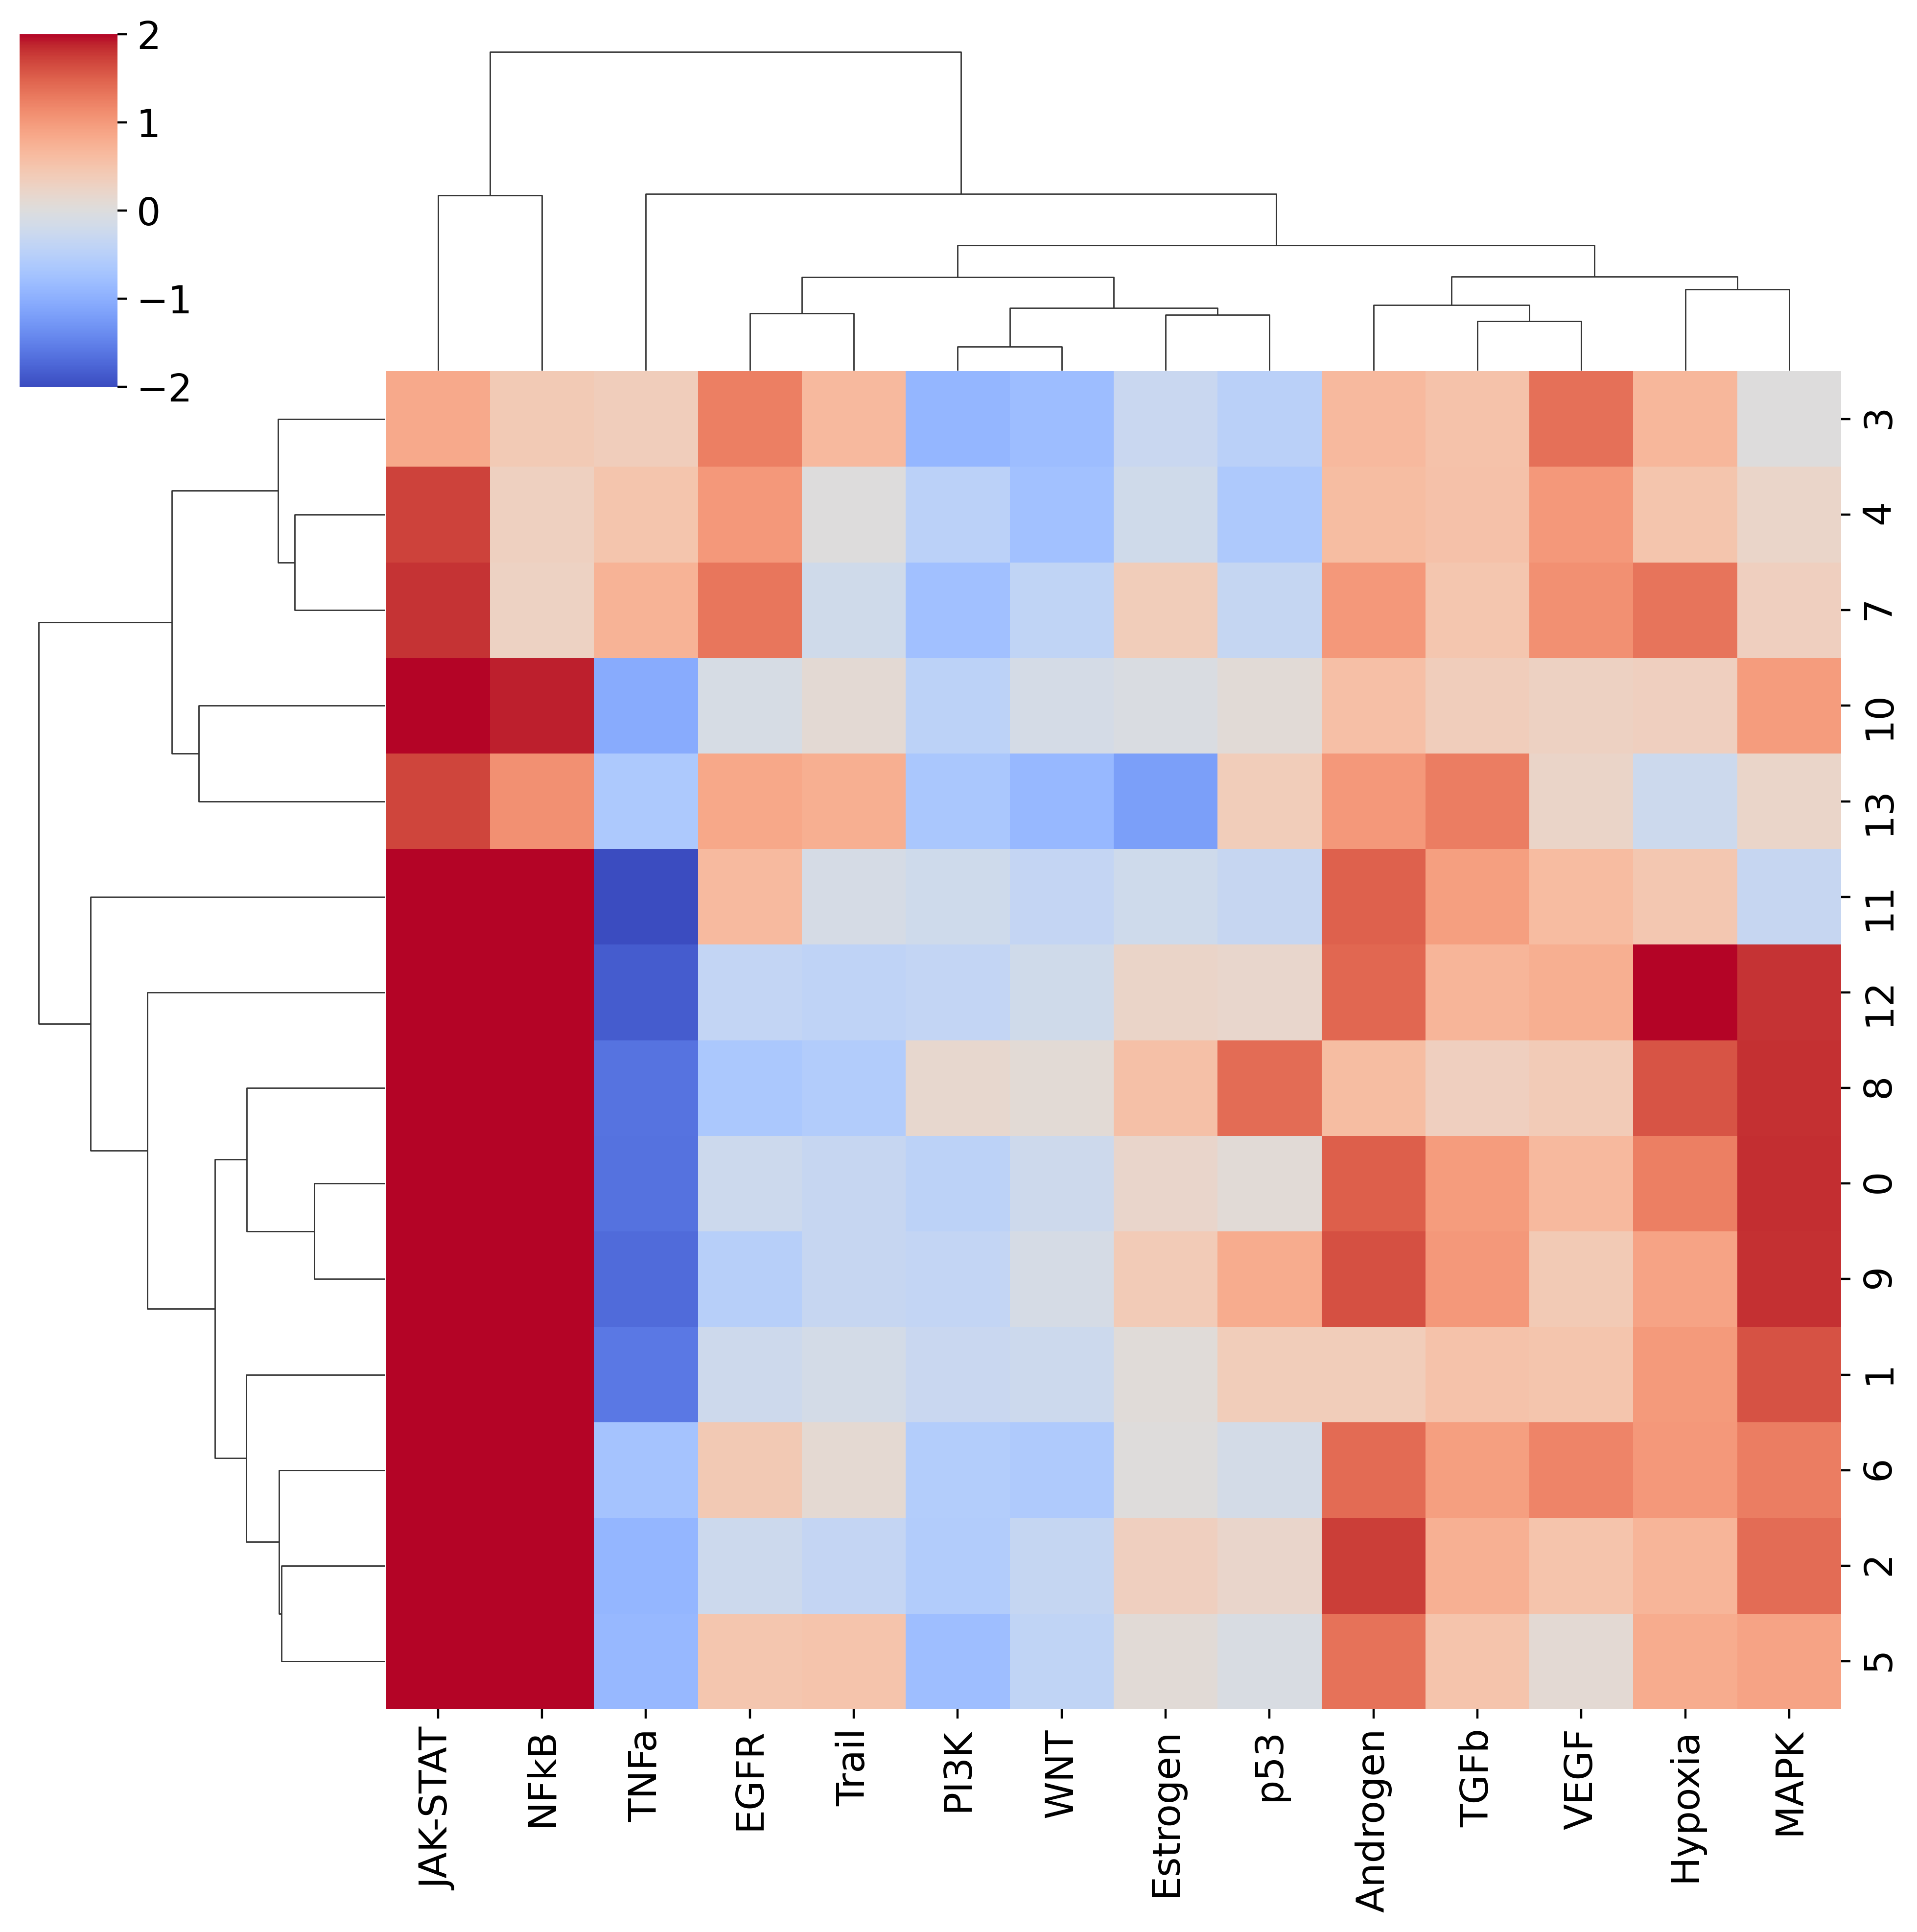

In [31]:
sns.clustermap(mean_acts, xticklabels=mean_acts.columns, vmin=-2, vmax=2, cmap='coolwarm')
plt.show()

# Dorothea

In [15]:
net = dc.get_dorothea(organism='mouse', levels=['A','B','C'])
net

,source,confidence,target,weight
0,E2f4,A,Mycl,1.000000
1,Tp53,A,Ogg1,1.000000
2,E2f4,A,Bach1,1.000000
3,Hif1a,A,Mif,1.000000
4,E2f4,A,Aurkb,1.000000
...,...,...,...,...
30885,Irf4,C,Jak1,0.333333
30886,Irf4,C,Il16,0.333333
30887,Irf4,C,Ikzf3,0.333333
30888,Irf4,C,Lpp,0.333333


In [16]:
dc.run_mlm(mat=adata, net=net, source='source', target='target', weight='weight', verbose=True)

Running mlm on mat with 37525 samples and 16566 targets for 281 sources.


100%|██████████| 4/4 [00:24<00:00,  6.01s/it]


In [17]:
adata.obsm['dorothea_mlm_estimate'] = adata.obsm['mlm_estimate'].copy()
adata.obsm['dorothea_mlm_pvals'] = adata.obsm['mlm_pvals'].copy()

In [18]:
acts = dc.get_acts(adata, obsm_key='mlm_estimate')
acts

AnnData object with n_obs × n_vars = 37525 × 281
    obs: 'doublet_scores', 'predicted_doublets', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_disaggregation_score', 'pct_counts_disaggregation_score', 'total_counts_rb', 'pct_counts_rb', 'n_genes', 'SampleID', 'Treatment', 'MouseID', 'batch', 'S_score', 'G2M_score', 'phase', 'desc_0.2', 'desc_0.3', 'desc_0.4', 'desc_0.5', 'desc_0.6', 'desc_0.7', 'desc_0.8', 'desc_0.9', 'desc_1.0', 'desc_1.2'
    uns: 'hvg', 'pca', 'prob_matrix0.2', 'prob_matrix0.3', 'prob_matrix0.4', 'prob_matrix0.5', 'prob_matrix0.6', 'prob_matrix0.7', 'prob_matrix0.8', 'prob_matrix0.9', 'prob_matrix1.0', 'prob_matrix1.2', 'umap', 'neighbors'
    obsm: 'X_Embeded_z0.2', 'X_Embeded_z0.3', 'X_Embeded_z0.4', 'X_Embeded_z0.5', 'X_Embeded_z0.6', 'X_Embeded_z0.7', 'X_Embeded_z0.8', 'X_Embeded_z0.9', 'X_Embeded_z1.0', 'X_Embeded_z1.2', 'X_pca', 'X_umap', 'X_umap0.2', 'X_umap0.3', 'X_umap0.4', 'X_umap0.5', 'X_umap0.6', 'X_umap0.7', 'X_

In [19]:
mean_acts = dc.summarize_acts(acts, groupby='desc_0.5', min_std=0.75)
mean_acts

,Arid3a,Atf3,Atf4,Atf6,Bhlhe40,Cebpb,Creb1,Creb3,Ctcfl,E2f4,...,Tbp,Tcf4,Tcf7l2,Tp53,Tp73,Vdr,Wt1,Zbtb7a,Zeb2,Zkscan1
0,-2.355228,-0.566889,2.147726,0.395950,4.192777,0.072661,-1.081609,0.682163,5.057873,1.094125,...,6.093476,1.034481,-2.662077,3.258370,1.656744,4.104680,-0.727936,3.284650,3.474310,5.303542
1,-2.971139,-0.194994,1.903938,0.041500,6.387906,0.540246,-1.397468,0.755483,7.085325,1.457223,...,8.106911,-0.088366,-1.980509,3.065130,0.291087,5.130669,-0.720295,4.493312,2.635001,7.469468
10,-1.561592,0.183331,1.396102,0.545579,2.780024,-0.538851,-0.398663,0.214092,3.202890,0.949214,...,3.835320,0.243108,-1.616305,2.031926,0.361098,2.925419,-0.412820,2.160118,1.791246,3.262758
11,-1.113900,4.670888,0.124619,-0.461294,5.013204,-1.681293,3.167253,0.243539,4.981315,2.361208,...,5.960759,-0.283623,-0.976184,0.922449,-0.797718,3.524246,-0.516355,2.877965,1.364150,4.923475
12,-1.367167,-0.006896,1.786664,0.600975,2.830085,-0.184319,-1.454218,1.115022,3.569947,0.806077,...,4.668970,1.850067,-3.463769,2.792966,1.376320,3.288769,-0.429661,2.216335,3.950269,3.783531
13,-3.327780,-1.159618,0.915992,3.083291,5.153646,-1.450614,-1.369459,1.967630,4.823491,2.720661,...,5.092282,-0.167027,-0.817697,1.992873,1.949917,4.541226,-1.154408,2.778518,1.998055,5.152844
2,-2.423218,-0.888395,2.386886,0.562726,4.088251,-0.616488,-1.586620,1.636223,4.627517,1.452264,...,5.480920,2.393604,-2.574788,3.488323,2.248479,3.960729,-0.706521,2.677271,4.274310,4.930454
3,-2.090714,4.542576,0.379453,1.138079,3.836222,-2.859660,1.845366,1.597086,3.949979,2.047725,...,3.364995,0.295477,-0.972216,1.558479,-0.206988,4.689348,1.040066,2.026143,1.147301,3.854487
4,-2.244727,2.566933,0.682294,1.525505,3.540602,-2.461059,0.722074,1.486456,3.417095,2.418308,...,2.831535,0.585334,-1.361832,1.796961,0.175980,5.190938,0.994445,1.771976,1.699993,3.410320
5,-3.459498,-1.163722,0.833179,0.616715,4.305867,-0.407611,3.089174,0.653947,4.532465,1.221823,...,5.098185,0.464807,-2.444920,2.370900,0.412402,3.935578,-1.411153,2.590857,3.091503,4.484513


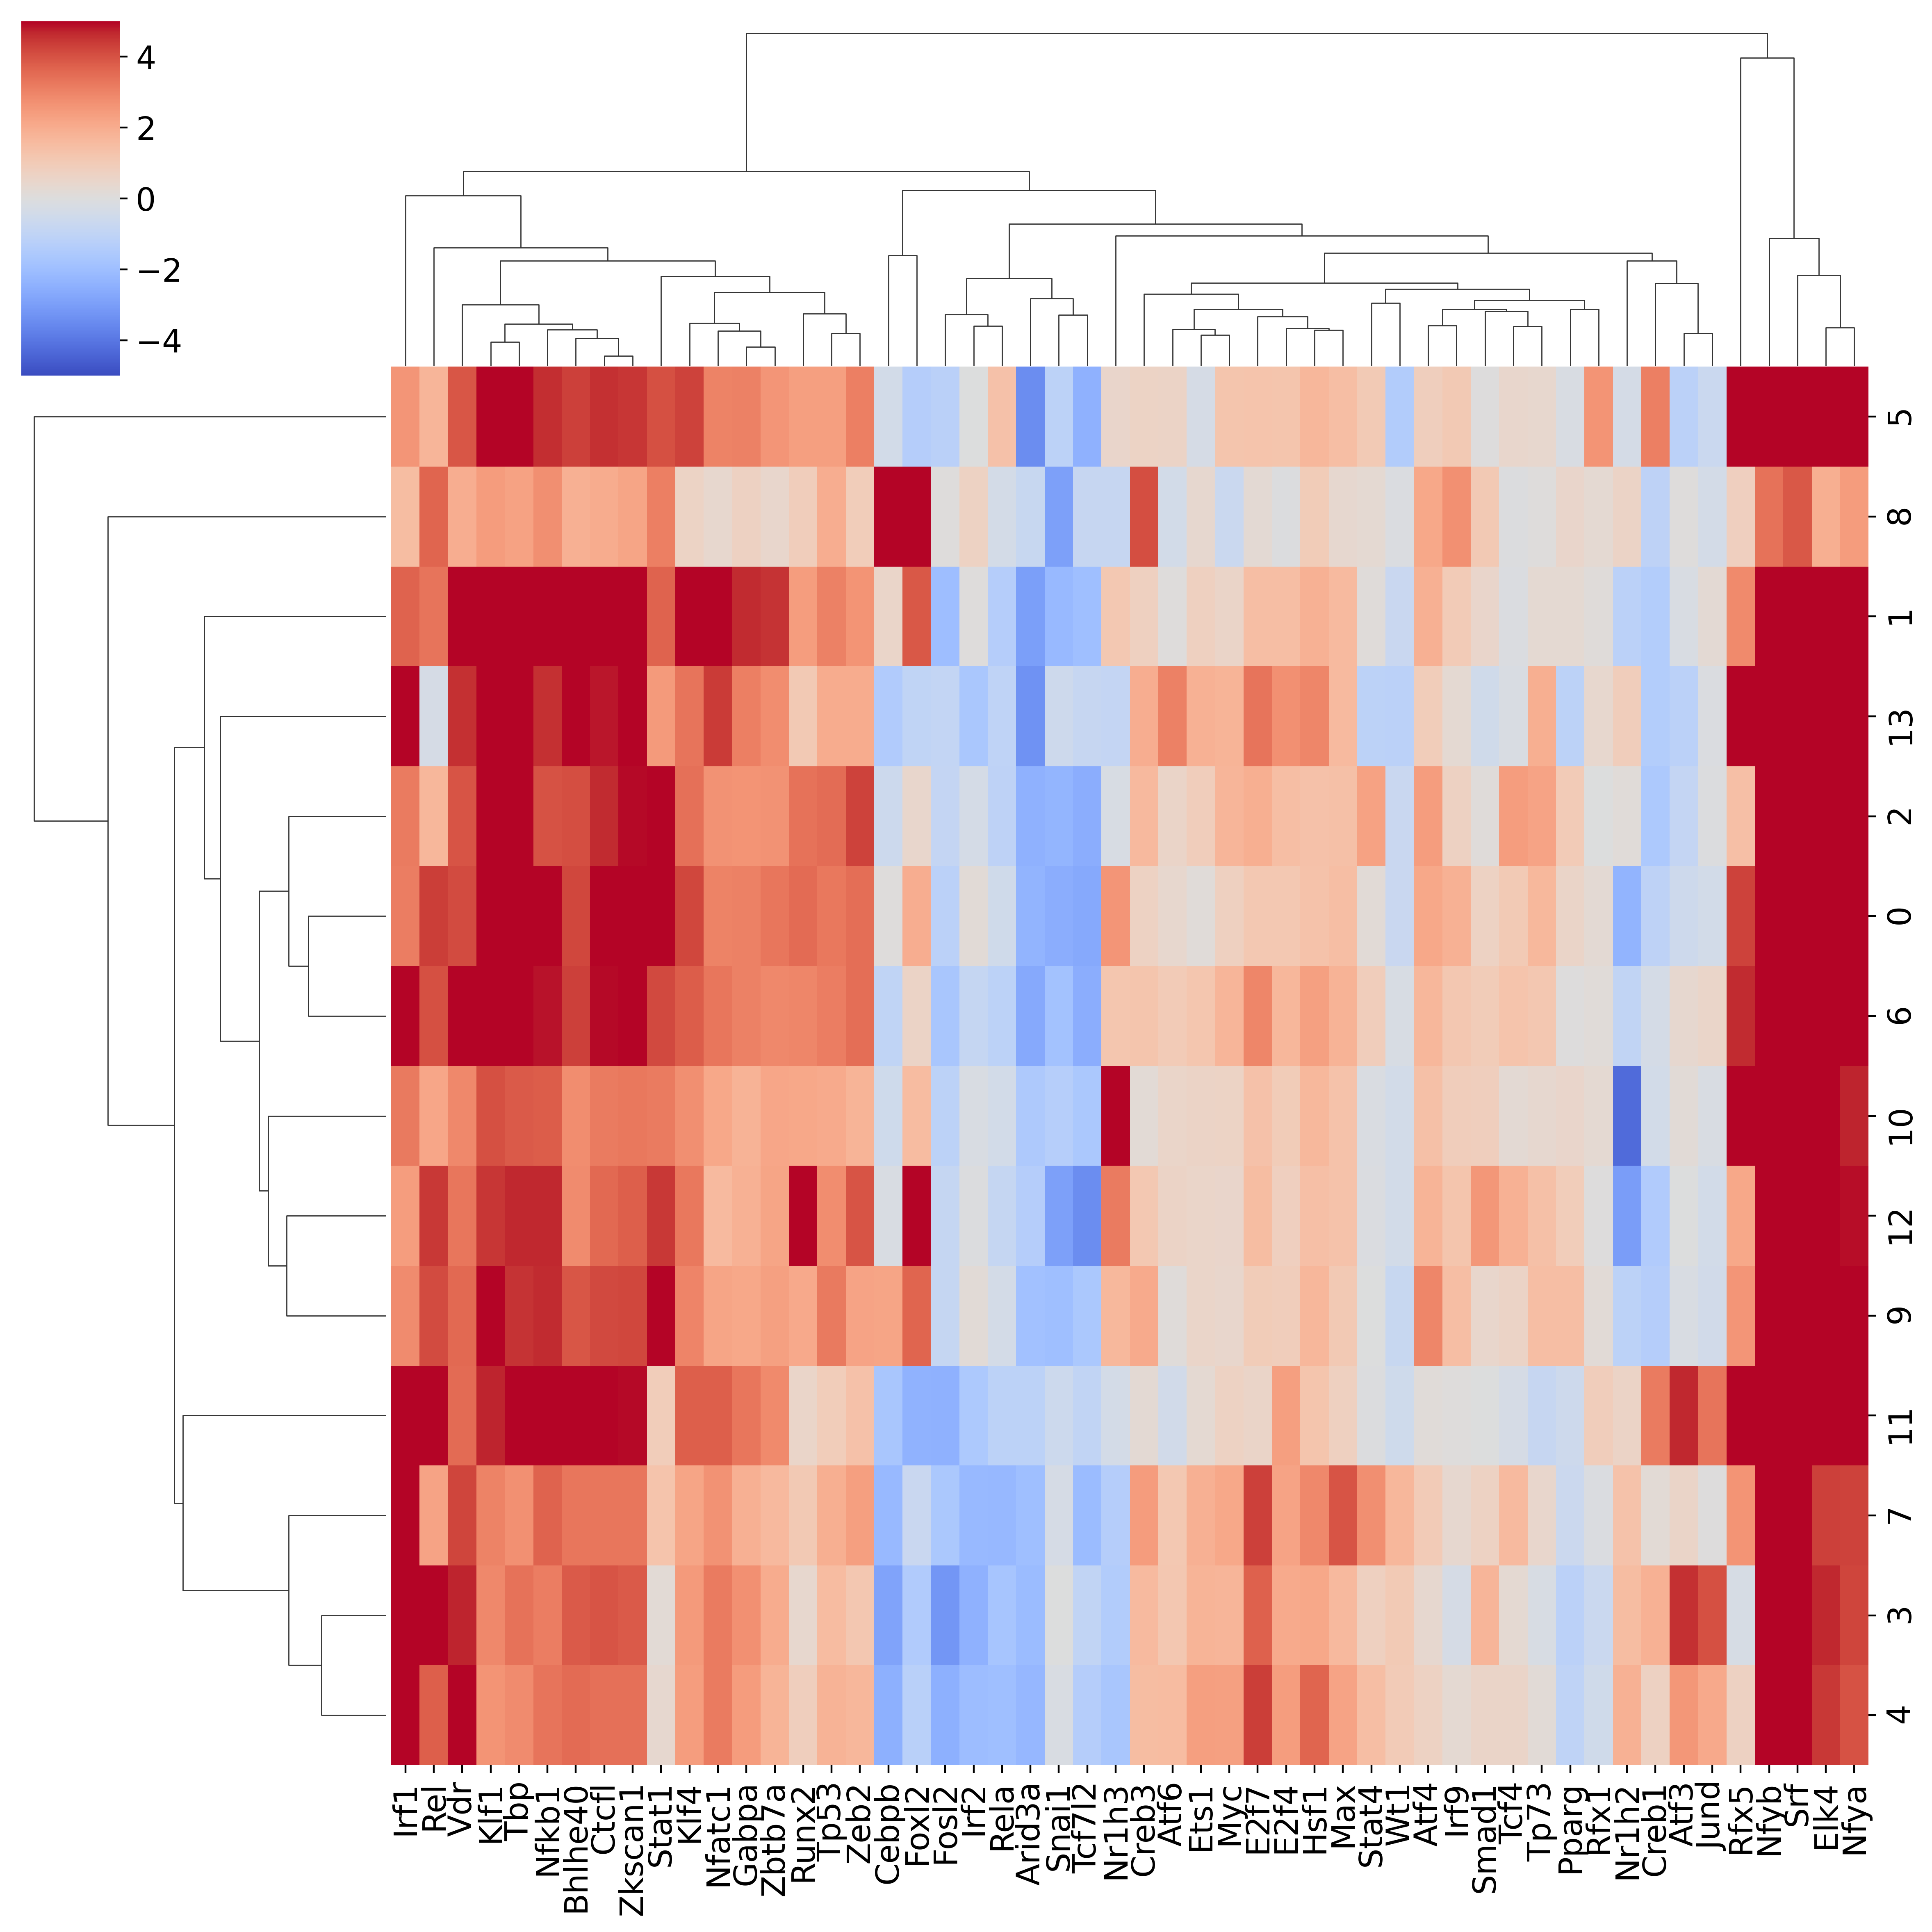

In [25]:

sns.clustermap(mean_acts, xticklabels=mean_acts.columns, vmin=-5, vmax=5, cmap='coolwarm',figsize=(12, 12))
plt.show()